### K Nearest Neighbors

In these slides we explore a simple but powerful learning algorithm called $K$ Nearest Neighbors (KNN).

KNN is an [instance based](https://en.wikipedia.org/wiki/Instance-based_learning) method that can be used for both classification and regression.

This means that it does not fit parameters (eg ${\bf w}$) based on data.

Instead if stores all of the training data and uses it directly to make predictions. 


The KNN algorithm is very simple:

    prediction(new_input,X_train):
        find the K instances in X_train that are "closest" to new_input
        return the mode class for these K instances as the predicted class for new_input


The mode is the "most common" class. 

This is what they call the "plurality" in the context of voting. 

It is not necessarily the majority in a multiclass setting. 



In [33]:
import numpy as np
from scipy.stats import mode


def euclidean(X,x):
    return np.linalg.norm(X-x,axis=1)



def KNN(X,x,k=3,distance = euclidean):
    """Return the row indexes of the k nearest neighbors of x
       in the matrix X"""
    distances = distance(X,x)
    neighbors = []
    for i in range(k):
        nearest = distances.argmin()
        neighbors.append(nearest)
        distances[nearest] = distances.max()
    return neighbors

def KNN_predict_all(X_known,y_known,X_predict,k=3,distance=euclidean,regression= False):
    y_hat = np.empty(X_predict.shape[0])
    for i,x in enumerate(X_predict):
        knn = KNN(X_known,x,k,distance)
        if regression:
            y_hat[i] = np.mean(y_known[knn])
        else:
            y_hat[i] = mode(y_known[knn],keepdims=True)[0][0]
    return y_hat



### Regularization

You might have noticed from the images in this notebook that the "K" in KNN is a dial that adjusts bias and variance.

When $K$ is low, variance is high.

When $K$ is high, bias is high.

Thus $K$ is a hyperparameter that has to be tuned.

The right level depends on the inherent complexity of the classification problem and also the amount of data we have.




###  Regression

KNN can be used for regression as easily as classification.

Rather than take the mode of the neigboring labels, we simply take their mean.


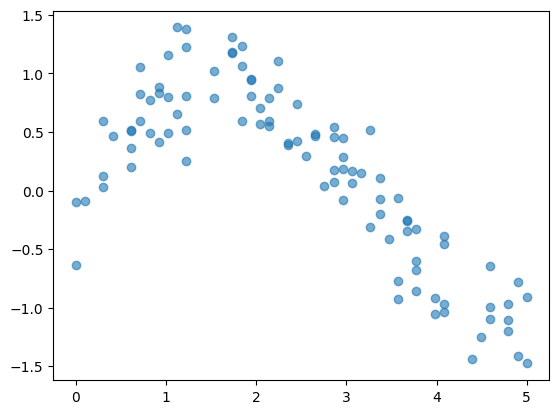

In [34]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
xx = np.linspace(0,5)
X = np.random.choice(xx,100)
y = np.sin(X)+ np.random.randn(len(X))/4
plt.scatter(X,y,alpha=0.6)
plt.show()

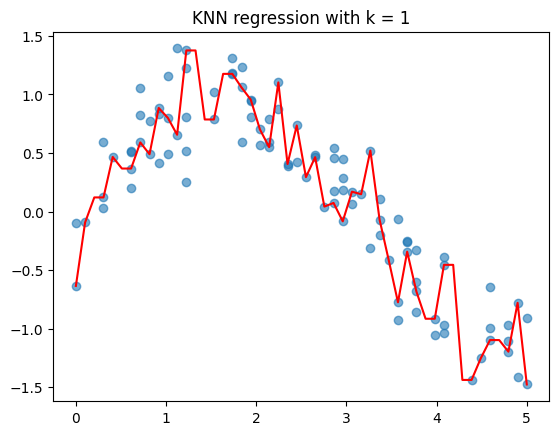

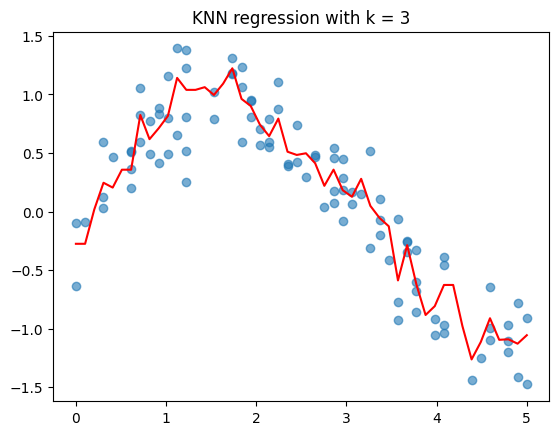

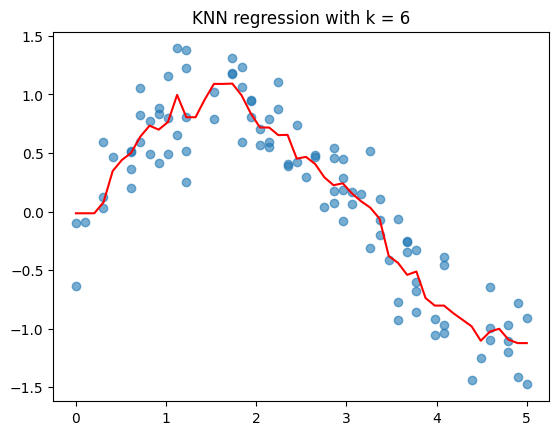

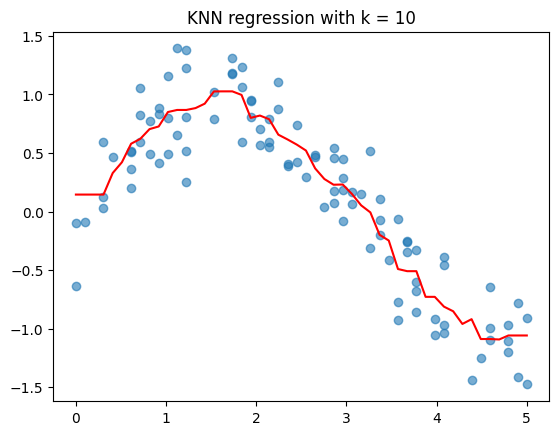

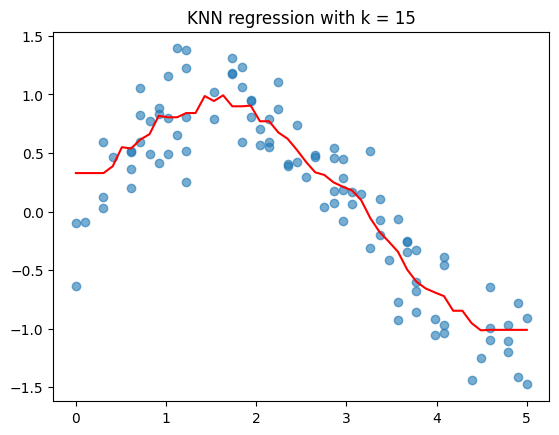

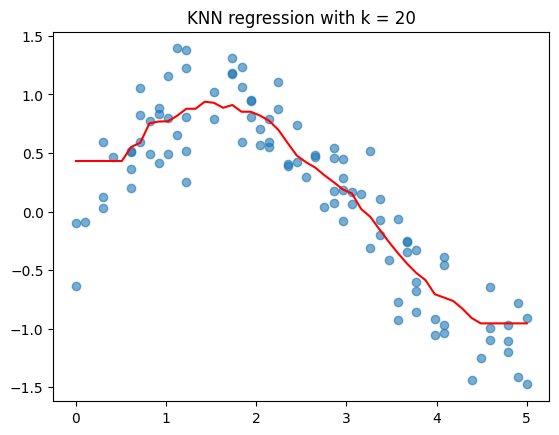

In [35]:
# KNN_predict_all(X_known,y_known,X_predict,k=3,distance=euclidean,regression= False):

for k in [1,3,6,10,15,20]:
    yhat = KNN_predict_all(X.reshape(-1,1),y,xx,regression=True,k=k)
    plt.scatter(X,y,alpha=0.6)
    plt.plot(xx,yhat,c='r')
    plt.title("KNN regression with k = {}".format(k))
    plt.show()

### A real dataset

Here we apply KNN regression to the concrete dataset.


In [36]:
import pandas as pd

df = pd.read_excel("Concrete_Data.xls")
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [37]:

from sklearn.model_selection import train_test_split
X = df.values[:,:-1]
y = df.values[:,-1]

X_train,X_test,y_train,y_test = train_test_split(X,y)

from sklearn.metrics import r2_score

for k in [1,3,6,10,15,20]:

    yhat = KNN_predict_all(X_train,y_train,X_test,k=k)


    score_test = r2_score(yhat,y_test)
    print("Performance of k={} is {}".format(k,score_test))
    



Performance of k=1 is 0.6909983250154688
Performance of k=3 is 0.3517098274195637
Performance of k=6 is -0.24763870294529777
Performance of k=10 is -0.7932259207510348
Performance of k=15 is -1.198811913434259
Performance of k=20 is -1.1139679660595925


In [38]:
from sklearn.neighbors import KNeighborsRegressor

#knn = KNeighborsRegressor(weights="distance",p=2)
knn = KNeighborsRegressor(n_neighbors=1)
knn.fit(X_train,y_train)

knn.score(X_test,y_test)


0.680848273283618